# Prediction analysis

This notebook serves the purpose to plot the predictions in order to analyse them for further model improvements. At the same time variable importance can be analysed.

In [1]:
import os

import numpy as np
import matplotlib.pyplot as plt

In [2]:
os.chdir("..")

from training import training_cv
from utils import load_train_data
from inference import plot_confusion_matrix

## Load data

In [3]:
X, y, le = load_train_data()

## Inspect currently best model on test data
XGB - 24.02.2023  13:54:00

In [4]:
# run training on 5-split CV
cv, cv_results = training_cv(model_class="XGB", n_jobs=6)

Fold 0: training accuracy 1.000, testing accuracy 0.906
Fold 1: training accuracy 1.000, testing accuracy 0.909
Fold 2: training accuracy 1.000, testing accuracy 0.897
Fold 3: training accuracy 1.000, testing accuracy 0.906
Fold 4: training accuracy 1.000, testing accuracy 0.913
----------- Mean train accuracy: 1.000 -----------
----------- Mean test accuracy:  0.906 -----------


In [5]:
# get cv indexes and stack all predictions from the testing sets
cv_idx = []
test_pred = np.empty(0)
true = np.empty(0)

for i, (train_index, test_index) in enumerate(cv.split(X)):
    cv_idx.append([train_index, test_index])
    test_pred = np.append(test_pred, cv_results["estimator"][i].predict(X.loc[test_index, :]))
    true = np.append(true, y[test_index])

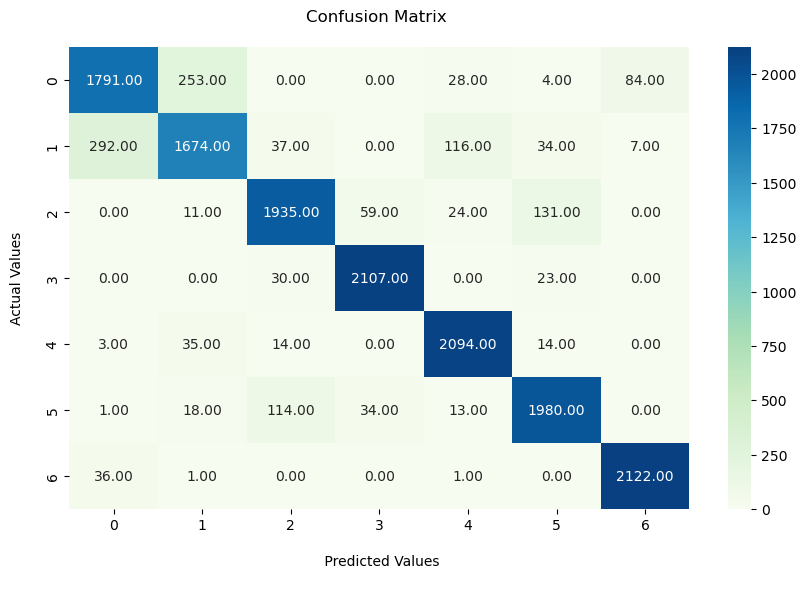

In [6]:
# plot confusion matrix
plot_confusion_matrix(true, test_pred)

LogReg Baseline (all feature eng except aggregation method)

In [4]:
# run training on 5-split CV
cv, cv_results = training_cv(model_class="LogReg", n_jobs=6)

/Users/mariastoelben/opt/anaconda3/envs/PythonforDataScience/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/mariastoelben/opt/anaconda3/envs/PythonforDataScience/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:

Fold 0: training accuracy 0.406, testing accuracy 0.407
Fold 1: training accuracy 0.390, testing accuracy 0.391
Fold 2: training accuracy 0.394, testing accuracy 0.392
Fold 3: training accuracy 0.403, testing accuracy 0.403
Fold 4: training accuracy 0.405, testing accuracy 0.402
----------- Mean train accuracy: 0.400 -----------
----------- Mean test accuracy:  0.399 -----------


In [6]:
# get cv indexes and stack all predictions from the testing sets
cv_idx = []
test_pred = np.empty(0)
true = np.empty(0)

for i, (train_index, test_index) in enumerate(cv.split(X)):
    cv_idx.append([train_index, test_index])
    test_pred = np.append(test_pred, cv_results["estimator"][i].predict(X.loc[test_index, :]))
    true = np.append(true, y[test_index])

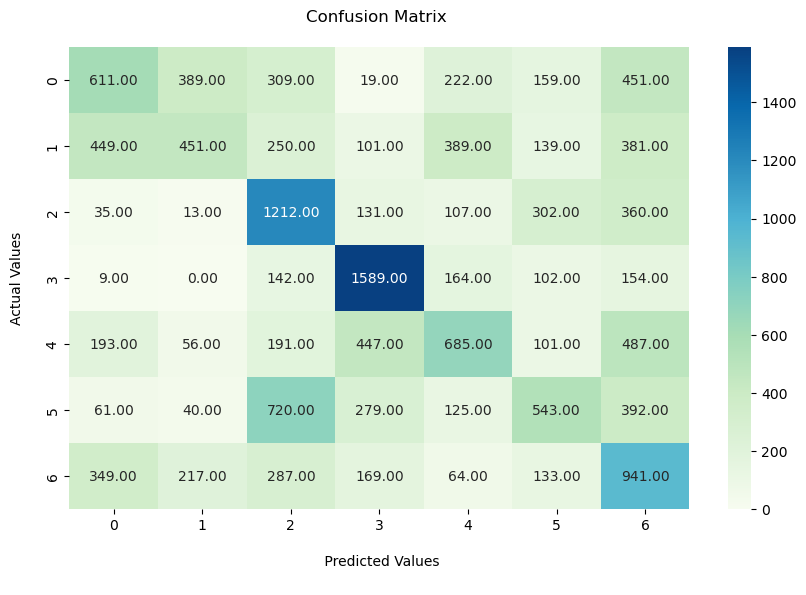

In [7]:
# plot confusion matrix
plot_confusion_matrix(true, test_pred)